In [1]:
import pandas as pd
ezh_pk='https://ftp.ncbi.nlm.nih.gov/geo/series/GSE76nnn/GSE76626/suppl/GSE76626_ChIP-Seq_RPM.txt.gz' ## hg38

In [3]:
l=range(1,4)
dics={
      'y1':'https://artyomovlab.wustl.edu/publications/supp_materials/aging/rrbs/per_donor/methylcall.CpG.YD1.mincov0.txt',
      'y2':'https://artyomovlab.wustl.edu/publications/supp_materials/aging/rrbs/per_donor/methylcall.CpG.YD2.mincov0.txt',
      'y3':'https://artyomovlab.wustl.edu/publications/supp_materials/aging/rrbs/per_donor/methylcall.CpG.YD3.mincov0.txt',
      'y4':'https://artyomovlab.wustl.edu/publications/supp_materials/aging/rrbs/per_donor/methylcall.CpG.YD4.mincov0.txt',
      'y5':'https://artyomovlab.wustl.edu/publications/supp_materials/aging/rrbs/per_donor/methylcall.CpG.YD5.mincov0.txt',
      'y6':'https://artyomovlab.wustl.edu/publications/supp_materials/aging/rrbs/per_donor/methylcall.CpG.YD6.mincov0.txt',
      'o1':'https://artyomovlab.wustl.edu/publications/supp_materials/aging/rrbs/per_donor/methylcall.CpG.OD1.mincov0.txt',
      'o2':'https://artyomovlab.wustl.edu/publications/supp_materials/aging/rrbs/per_donor/methylcall.CpG.OD2.mincov0.txt',
      'o3':'https://artyomovlab.wustl.edu/publications/supp_materials/aging/rrbs/per_donor/methylcall.CpG.OD3.mincov0.txt',
      'o4':'https://artyomovlab.wustl.edu/publications/supp_materials/aging/rrbs/per_donor/methylcall.CpG.OD4.mincov0.txt',
      'o5':'https://artyomovlab.wustl.edu/publications/supp_materials/aging/rrbs/per_donor/methylcall.CpG.OD5.mincov0.txt',
      'o6':'https://artyomovlab.wustl.edu/publications/supp_materials/aging/rrbs/per_donor/methylcall.CpG.OD6.mincov0.txt',
     }
dfs={}
for key, value in dics.items():
    if int(key[1:]) in l:
        dfs[key]=pd.read_table(value,index_col=0)
        print(key,end=',')

y1,y2,y3,o1,o2,o3,

In [5]:
ch=1
for key, value in dics.items():
    if int(key[1:]) in l:
        df=dfs[key]
        df=df[df.chr=='chr'+str(ch)]
        print(df.shape)
        dfs[key]=df

(443681, 6)
(531474, 6)
(409769, 6)
(334497, 6)
(369900, 6)
(369907, 6)


In [6]:
inds=[]
for key, value in dics.items():
    if int(key[1:]) in l:
        df=dfs[key]
        inds.append(df.index)

In [7]:
inds=set().union(*inds)
len(inds)

852665

In [8]:
dg=pd.DataFrame()
dg.index=inds

In [9]:
for key, value in dics.items():
    if int(key[1:]) in l:
        df=dfs[key]
        df['m_'+key]=df.freqC*df.coverage/100
        df['u_'+key]=df.freqT*df.coverage/100
        df=df.drop(['chr','base','strand','coverage','freqC','freqT'],1)
        dfs[key]=df

<ipython-input-9-ee1f8acb7556>:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df=df.drop(['chr','base','strand','coverage','freqC','freqT'],1)


In [10]:
for key, value in dics.items():
    if int(key[1:]) in l:
        df=dfs[key]
        dg=dg.merge(dfs[key],left_index=True,right_index=True,how='left')
dg.shape

(852665, 12)

In [12]:
dg['uy']=0
dg['my']=0
dg['uo']=0
dg['mo']=0
for i in l:
    dg['uy']=dg['uy']+dg['u_y'+str(i)]
    dg['my']=dg['my']+dg['m_y'+str(i)]
    dg['uo']=dg['uo']+dg['u_o'+str(i)]
    dg['mo']=dg['mo']+dg['m_o'+str(i)]

In [13]:
dg['by']=dg.my/(dg.my+dg.uy)
dg['bo']=dg.mo/(dg.mo+dg.uo)

In [14]:
dg['base']=dg.index.str[5:].astype(int)

In [15]:
dg=dg.sort_values('base')

In [16]:
#dg[dg.base>11044800].head(10)

In [17]:
dg=dg[['base','by','bo']]
dg['chr']='chr'+str(ch)
dg['base2']=dg['base']

In [18]:
dg[['chr','base','base2','by','bo']].to_csv('hg19_mono.txt',index=False,header=False,sep='\t')

In [19]:
!CrossMap.py bed hg19ToHg38.over.chain.gz hg19_mono.txt hg38_mono.txt

2021-11-16 03:36:56 [INFO]  Read the chain file "hg19ToHg38.over.chain.gz" 


In [20]:
df38=pd.read_table('hg38_mono.txt',header=None,names=['chr','b1','b2','by','bo'])
df38.shape

(852541, 5)

In [21]:
ezh=pd.read_table(ezh_pk,index_col=0)
ezh=ezh[ezh.Chromosome!='MT']
ezh=ezh[['Chromosome','Start','End','WT_EZH2']][ezh['WT_EZH2']>2]
ezh.columns=['chrom', 'chromStart', 'chromEnd', 'value']
ezh['chrom']=ezh.chrom.astype(str)
print(ezh.shape)
ez=ezh[ezh.chrom==str(ch)]
ez['r']=ez.apply(lambda x:range(x['chromStart'],x['chromEnd']),1)
ez=ez['r'].tolist()
ez=set([item for sublist in ez for item in sublist])

(1219, 4)


/home/moqri/anaconda3/envs/stem/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3437: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/moqri/anaconda3/envs/stem/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [22]:
df38[df38['b1'].isin(ez)].dropna().shape

(5186, 5)

In [23]:
df38[df38['b1'].isin(ez)].dropna().mean()

<ipython-input-23-283bafdc63e2>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df38[df38['b1'].isin(ez)].dropna().mean()


b1    6.582364e+07
b2    6.582364e+07
by    4.876064e-02
bo    5.112738e-02
dtype: float64

In [24]:
df38[['by','bo']].dropna().mean()

by    0.386446
bo    0.388127
dtype: float64

In [25]:
v='38'
h9_bw='http://smithdata.usc.edu/methbase/data/Xie-Human-2013/Human_H9/tracks_hg'+v+'/Human_H9.meth.bw'
import pyBigWig

def f(cell,ch):
    df=cell.intervals("chr"+str(ch))
    print(len(df))
    df=pd.DataFrame(df)
    df.index=df[0]
    df=df[2]
    return(df)

In [45]:
h=pyBigWig.open(h9_bw)

In [46]:
h=f(h,ch)

2264861


<AxesSubplot:>

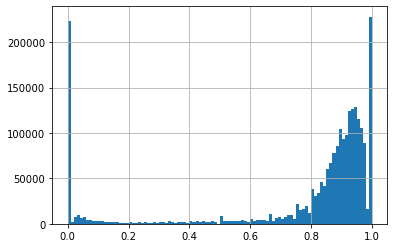

In [47]:
h.hist(bins=100)

In [62]:
hl=h[h<.5]
hl.shape

(343932,)

In [63]:
hh=h[h>.5]
hh.shape

(1912390,)

In [84]:
df38.dropna()[df38['b1'].isin(ez)].shape

<ipython-input-84-ffa10444b025>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df38.dropna()[df38['b1'].isin(ez)].shape


(5186, 5)

In [109]:
df38.dropna()[~(df38['b1']-1).isin(hl.index)][df38['b1'].isin(ez)].mean()

<ipython-input-109-c8a25cf27496>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df38.dropna()[~(df38['b1']-1).isin(hl.index)][df38['b1'].isin(ez)].mean()
<ipython-input-109-c8a25cf27496>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df38.dropna()[~(df38['b1']-1).isin(hl.index)][df38['b1'].isin(ez)].mean()


b1    6.556253e+07
b2    6.556253e+07
by    5.769499e-02
bo    6.027179e-02
dtype: float64